In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import shapely
import json

## Block 1

#### Question #### 
* Is the Chicago zip code with the most grocery stores more or less affluent relative to Chicago itself?

1. _Use distribution of `ZIP CODE` and load in dataframe that shows avg income by zip code_
2. _Figure out geopandas and find geographic data, load that in_
3. _Create two plots highlighting grocery store density and income by zip code and compare_


#### note
The old Chicago grocery store dataset is from 2013, so while the new data doesn't have as many parameters, it still has whatever I need and was last updated in September 2020, so very recent.

In [105]:
#load in new dataframe
chi_grocery = pd.read_csv('../data/chigrocery.csv')
chi_grocery.head()

,Store Name,Address,Zip,New status,Last updated,Location
0,Cermak Produce,4000 West Diversey Ave,60647,OPEN,06/04/2020 03:00:00 PM,NaN
1,Jewel - Osco,2520 N Narragansett Ave,60639-1041,OPEN,06/03/2020 05:00:00 PM,POINT (-87.785559 41.926236)
2,Mariano's Fresh Market,40 S Halsted St,60661-3506,OPEN,NaN,POINT (-87.647384 41.880557)
3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,POINT (-87.66563800000002 41.836512)
4,Aldi,7800 S South Chicago Ave,60619-2724,OPEN,06/05/2020 01:21:00 PM,POINT (-87.587472 41.752778)


###### I only want the beginning digits of Zip Codes to clean up the data

In [106]:
type(chi_grocery['Zip'])

pandas.core.series.Series

In [107]:
chi_grocery['Zip']

0           60647
1      60639-1041
2      60661-3506
3           60608
4      60619-2724
          ...    
259         60616
260    60659-2608
261         60638
262         60634
263         60625
Name: Zip, Length: 264, dtype: object

In [108]:
#Removing NaN values so I can split the Zip Codes
chi_grocery = chi_grocery.dropna(subset = ['Zip'], how = "any")

In [109]:
chi_grocery['Zip']

0           60647
1      60639-1041
2      60661-3506
3           60608
4      60619-2724
          ...    
259         60616
260    60659-2608
261         60638
262         60634
263         60625
Name: Zip, Length: 263, dtype: object

There was one NaN value making my life a little difficult

In [110]:
#create new function isolating the zipcodes
def new_zip(zipcode):
    split_zipcode = zipcode.split("-")
    return split_zipcode[0]

In [111]:
chi_grocery['Zip'] = chi_grocery['Zip'].apply(new_zip)
chi_grocery.head()

,Store Name,Address,Zip,New status,Last updated,Location
0,Cermak Produce,4000 West Diversey Ave,60647,OPEN,06/04/2020 03:00:00 PM,NaN
1,Jewel - Osco,2520 N Narragansett Ave,60639,OPEN,06/03/2020 05:00:00 PM,POINT (-87.785559 41.926236)
2,Mariano's Fresh Market,40 S Halsted St,60661,OPEN,NaN,POINT (-87.647384 41.880557)
3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,POINT (-87.66563800000002 41.836512)
4,Aldi,7800 S South Chicago Ave,60619,OPEN,06/05/2020 01:21:00 PM,POINT (-87.587472 41.752778)


In [112]:
zip_dist = chi_grocery['Zip'].value_counts()

In [185]:
len(zip_dist)

54

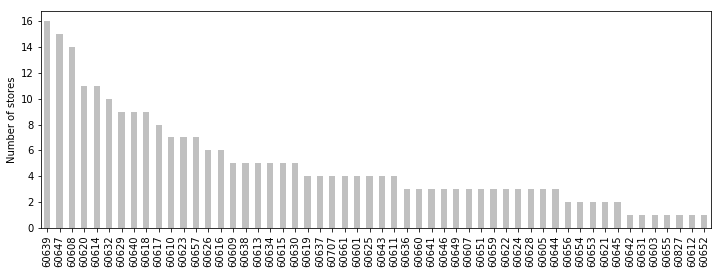

In [113]:
zip_dist.plot(kind='bar', 
              color='#c0c0c0', 
              figsize=(12,4),
              ylabel='Number of stores'
             )

In [120]:
chidata = json.load(open('../data/chicagogeo.json'))

In [228]:
chistr=json.dumps(chidata, indent=4)

If I want to map the data, I need to separate the values for longitude and latitude since they are both in the same column in this dataframe. Latitude is written first, but all points are also accompanied by a "POINT", which will be _super_ fun to deal with.

* Also NaN values that I have to get rid of.

In [125]:
chi_grocery = chi_grocery.dropna(subset = ['Location'], how = "any")
chi_grocery['Location']
#2 NaN values gone now

1              POINT (-87.785559 41.926236)
2              POINT (-87.647384 41.880557)
3      POINT (-87.66563800000002 41.836512)
4              POINT (-87.587472 41.752778)
5              POINT (-87.663901 41.765174)
                       ...                 
259            POINT (-87.633033 41.843813)
260            POINT (-87.699541 41.994349)
261            POINT (-87.782075 41.777702)
262    POINT (-87.79769200000001 41.938134)
263            POINT (-87.707908 41.968473)
Name: Location, Length: 261, dtype: object

In [139]:
def latitudegetter(locationvalue):
#latitude will be written first
    split_location1 = locationvalue.split(" ")
    return split_location1[1]


def longitudegetter(locationvalue):
#longitude will be written second
    split_location2 = locationvalue.split(" ")
    return split_location2[2]

In [141]:
chi_grocery['Latitude'] = chi_grocery['Location'].apply(latitudegetter)
chi_grocery['Longitude'] = chi_grocery['Location'].apply(longitudegetter)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Gonna put a pin in the mapping - just going to compare incomes

# FB

* This is an interesting one because the CSV data sheet obviously at some point had a `geometry` column with `shapely` like objects in it. But it is loaded into `pandas` as a string onbject.


* There is a helper function in `shapely` that will turn a string into a geometry object
    * `shapely.wkt.loads()`, for example:


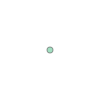

In [235]:
point_str = 'POINT (-87.785559 41.926236)'
shapely.wkt.loads(point_str)

* So you can apply this to each of the values in the `Location` column and then add the new column as `geometry` and create `GeoDataFrame`:

In [247]:
chi_grocery['geometry']=chi_grocery['Location'].apply(shapely.wkt.loads)

In [248]:
chi_grocery.head()

,Store Name,Address,Zip,New status,Last updated,Location,Latitude,Longitude,geometry
1,Jewel - Osco,2520 N Narragansett Ave,60639,OPEN,06/03/2020 05:00:00 PM,POINT (-87.785559 41.926236),(-87.785559,41.926236),POINT (-87.78555900000001 41.926236)
2,Mariano's Fresh Market,40 S Halsted St,60661,OPEN,NaN,POINT (-87.647384 41.880557),(-87.647384,41.880557),POINT (-87.647384 41.880557)
3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,POINT (-87.66563800000002 41.836512),(-87.66563800000002,41.836512),POINT (-87.66563800000002 41.836512)
4,Aldi,7800 S South Chicago Ave,60619,OPEN,06/05/2020 01:21:00 PM,POINT (-87.587472 41.752778),(-87.587472,41.752778),POINT (-87.58747200000001 41.752778)
5,Food 4 Less,7030 S Ashland Ave,60636,OPEN,06/05/2020 01:21:00 PM,POINT (-87.663901 41.765174),(-87.663901,41.765174),POINT (-87.663901 41.765174)


In [249]:
chi_grocery_gdf=gpd.GeoDataFrame(chi_grocery)

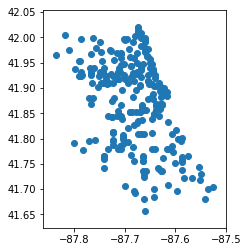

In [250]:
chi_grocery_gdf.plot()

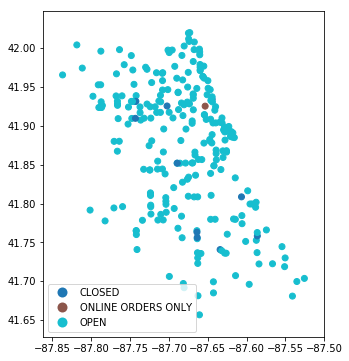

In [251]:
chi_grocery_gdf.plot(column='New status', legend=True, figsize=(6,6))

#### Looking at income

In [144]:
chicagoincome = pd.read_excel('../data/chicagoincome.xlsx')
chicagoincome.head()

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
0,1,60606,"41.881988, -87.637329","Chicago, Illinois",1682,100377,#259
1,2,60601,"41.885805, -87.622911","Chicago, Illinois",5591,77374,#961
2,3,60611,"41.893024, -87.618998","Chicago, Illinois",26522,69889,"#1,558"
3,4,60614,"41.922667, -87.652537","Chicago, Illinois",65474,68324,"#1,712"
4,5,60603,"41.880614, -87.629311","Chicago, Illinois",378,61815,"#2,591"


In [183]:
chicagoincome.shape

(55, 7)

Not sure what national rank means so I am going to ignore it, but the rest of the data is super useful. Again, has zip codes and location values.

I already have the distribution of grocery stores in each zip code, I just have to take the top 5 and compare them to the top 5 incomes. The income dataset is already sorted.

In [146]:
zip_dist.head()

60639    16
60647    15
60608    14
60620    11
60614    11
Name: Zip, dtype: int64

In [150]:
chicagoincome[['Zip Code','Avg. Income/H/hold']].head()

,Zip Code,Avg. Income/H/hold
0,60606,100377
1,60601,77374
2,60611,69889
3,60614,68324
4,60603,61815


Only one of these zip codes is one of the zip codes with the most grocery stores, so I will now see if there are more in the bottom.

In [153]:
chicagoincome[['Zip Code','Avg. Income/H/hold']][-5:]

,Zip Code,Avg. Income/H/hold
50,60637,23228
51,60624,22426
52,60621,19718
53,60653,14205
54,60654,0


Nope

In [156]:
#60639 is the most grocery store rich zip code. What is its income?
chicagoincome[chicagoincome['Zip Code'] == 60639]

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
26,27,60639,"41.920639, -87.755793","Chicago, Illinois",92951,40165,"#11,993"


In [158]:
chicagoincome['Avg. Income/H/hold'].mean()

41027.70909090909

In [160]:
chicagoincome['Avg. Income/H/hold'].median()

40083.0

So, the income of this zip code is average relative to the city of Chicago itself.

# FB

* Good work going through these steps and documenting them
* What are the units of `population`? Is `1682` just one thousand six hundred and eighty two or is in in thousands etc? You should make sure to document.

* Remember you should rename your columns so you don't have to do things like:
  ```
  chicagoincome['Avg. Income/H/hold']
  ```
* As we have mention often it is worth going through the exploration, cleaning and subsetting of a data frame one in a notebook and then saving the result. Then you can use the clean version in subsequent notebooks.  
  

## Block 2

Is there a grocery store chain that is prevalent in the most affluent zip codes of Chicago?

1. _Take most affluent zip codes_
2. _Create subset of Chicago grocery stores data set_
3. _Find the distribution of grocery stores_

In [186]:
#another look at the most affluent zip codes in Chicago and the incomes
chicagoincome[['Zip Code','Avg. Income/H/hold']].head()

,Zip Code,Avg. Income/H/hold
0,60606,100377
1,60601,77374
2,60611,69889
3,60614,68324
4,60603,61815


In [189]:
chi_zips_richest = ['60606','60601','60611','60614','60603']
richest_groceries = chi_grocery[chi_grocery['Zip'].isin(chi_zips_richest)]
richest_groceries['Store Name'].value_counts()

Target                            3
Trader Joe's                      3
Whole Foods Market                2
Aldi                              2
Potash Markets                    1
Bockwinkel's at McClurg           1
Bockwinkel's at Park Millenium    1
Big Apple Finer Foods             1
Jewel - Osco                      1
Mariano's Fresh Market            1
Costco                            1
Carnival Grocery & Liquor         1
Mariano's Lakeshore East          1
Bockwinkel's Fresh Express        1
Name: Store Name, dtype: int64

In [190]:
len(richest_groceries)

20

There are 20 grocery stores in these five zip codes. What is the population? How many grocery stores per person?

In [193]:
top_5_income_w_pop = chicagoincome.head()
top_5_income_w_pop['Population'].sum()

99647

A little less than 100,000 people. However, when looking at the names of these grocery stores, you can see that there are multiple Whole Foods and Trader Joe's, plus smaller stores that have "fresh" or something similar in the names. The common grocery stores in this area seem to contain fresher food, which tends to be more expensive.

# FB

* Good! You could use this approach to calculate a metric of stores-to-population ratio 


* Given that you have zip code in common you could subset the income data frame to two columns (zip and income) and then merge it with your grocery store one to make some of these calculations more straight forward.


* The national ranking I guess is based on all zipcodes across the US? That be quite interesting way to get a big income disparities within the city.

## Block 3
Is this any different for the least affluent zip codes?

In [201]:
# the least affluent zip codes
less_affluent = chicagoincome[-6:-1]
less_affluent

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
49,50,60602,"41.883067, -87.629187","Chicago, Illinois",70,23750,"#28,954"
50,51,60637,"41.780673, -87.603500","Chicago, Illinois",57090,23228,"#29,245"
51,52,60624,"41.880048, -87.722352","Chicago, Illinois",45647,22426,"#29,603"
52,53,60621,"41.776404, -87.640058","Chicago, Illinois",47514,19718,"#30,613"
53,54,60653,"41.819722, -87.611809","Chicago, Illinois",34502,14205,"#31,478"


In [195]:
chi_zips_not_richest = ['60602','60637','60624','60621','60653']
not_richest_groceries = chi_grocery[chi_grocery['Zip'].isin(chi_zips_not_richest)]
not_richest_groceries['Store Name'].value_counts()

Aldi                       3
Save A Lot                 2
One Stop Foods             1
Whole Foods Market         1
Woodlawn Super Fair LLC    1
Jewel - Osco               1
Leamington Foods           1
Name: Store Name, dtype: int64

In [196]:
len(not_richest_groceries)

10

There are half as many grocery stores in these zip codes, and half of them (Aldi, Save a Lot) are stores that are known for being much more affordable. 
* Are these 10 stores serving as many people as the 20 stores for the most affluent zip codes?

In [200]:
less_affluent['Population'].sum()

184823

We can see that there are much more people in these zip codes, but they have half as many grocery stores.

## Block 4 - Why the gap?
While the less affluent zip codes have relatively similar incomes, there is a bit more variation in the 5 most affluent zip codes. Let's have another look.

In [202]:
top_5_income_w_pop

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
0,1,60606,"41.881988, -87.637329","Chicago, Illinois",1682,100377,#259
1,2,60601,"41.885805, -87.622911","Chicago, Illinois",5591,77374,#961
2,3,60611,"41.893024, -87.618998","Chicago, Illinois",26522,69889,"#1,558"
3,4,60614,"41.922667, -87.652537","Chicago, Illinois",65474,68324,"#1,712"
4,5,60603,"41.880614, -87.629311","Chicago, Illinois",378,61815,"#2,591"


###### A few observations about this
* The richest zip code is more than 20k richer than the 2nd richest
* The 2nd richest zip code is about 8k richer than the 3rd richest
* There is a 40k gap between richest and 5th richest

I am going to look at the proportion of people who work in manufacturing in this zip code.

In [211]:
chi_manufacturing = pd.read_excel('../data/chimanufacturing.xlsx')
chi_manufacturing.head()

,#,Zip Code,Location,City,Population,% In Manufacturing,National Rank
0,1,60623,"41.847079, -87.719446","Chicago, Illinois",108144,0.2802,"#3,570"
1,2,60632,"41.810213, -87.711761","Chicago, Illinois",87577,0.2695,"#4,104"
2,3,60639,"41.920639, -87.755793","Chicago, Illinois",92951,0.2682,"#4,181"
3,4,60608,"41.848647, -87.672320","Chicago, Illinois",92472,0.2348,"#6,274"
4,5,60609,"41.812680, -87.656935","Chicago, Illinois",79469,0.2114,"#8,123"


The percents are not percents, so I have to fix that.

In [212]:
chi_manufacturing['% In Manufacturing'] = chi_manufacturing['% In Manufacturing']*100

chi_manufacturing.head()

,#,Zip Code,Location,City,Population,% In Manufacturing,National Rank
0,1,60623,"41.847079, -87.719446","Chicago, Illinois",108144,28.02,"#3,570"
1,2,60632,"41.810213, -87.711761","Chicago, Illinois",87577,26.95,"#4,104"
2,3,60639,"41.920639, -87.755793","Chicago, Illinois",92951,26.82,"#4,181"
3,4,60608,"41.848647, -87.672320","Chicago, Illinois",92472,23.48,"#6,274"
4,5,60609,"41.812680, -87.656935","Chicago, Illinois",79469,21.14,"#8,123"


In [214]:
#Now looking at the percent for the most affluent zip codes
richest_percent_manufacturing = chi_manufacturing[chi_manufacturing['Zip Code'].isin(chi_zips_richest)]
richest_percent_manufacturing

,#,Zip Code,Location,City,Population,% In Manufacturing,National Rank
37,38,60601,"41.885805, -87.622911","Chicago, Illinois",5591,6.61,"#25,271"
42,43,60611,"41.893024, -87.618998","Chicago, Illinois",26522,6.00,"#26,022"
44,45,60614,"41.922667, -87.652537","Chicago, Illinois",65474,5.74,"#26,338"
47,48,60606,"41.881988, -87.637329","Chicago, Illinois",1682,5.31,"#26,801"
52,53,60603,"41.880614, -87.629311","Chicago, Illinois",378,0.00,"#31,444"


The two most affluent zip codes are 60606 and 60601, so I want to look at those two percentages specifically to see if there is as much of a gap in that proportion as there is in income.

In [218]:
richest_percent_manufacturing.loc[[47,37]]

,#,Zip Code,Location,City,Population,% In Manufacturing,National Rank
47,48,60606,"41.881988, -87.637329","Chicago, Illinois",1682,5.31,"#26,801"
37,38,60601,"41.885805, -87.622911","Chicago, Illinois",5591,6.61,"#25,271"


`60606` is the most affluent zip code, and it has the least percent of its population employed in manufacturing. It has more than a percent less than the second most affluent. There is definitely a gap there, maybe not a large one, but there is a gap.

## Block 5
Are there more police stations or grocery stores in the 5 poorest and richest zip codes?

In [219]:
#load in new data
chipolice = pd.read_csv('../data/chipolice.csv')
chipolice.head()

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,6,Gresham,7808 S Halsted St,Chicago,IL,60620,http://home.chicagopolice.org/community/distri...,312-745-3617,312-745-3649,312-745-3639,1172283.013,1853022.646,41.752137,-87.644229,"(41.7521368378, -87.6442289066)"
2,11,Harrison,3151 W Harrison St,Chicago,IL,60612,http://home.chicagopolice.org/community/distri...,312-746-8386,312-746-4281,312-746-5151,1155244.069,1897148.755,41.873582,-87.705488,"(41.8735822883, -87.705488126)"
3,16,Jefferson Park,5151 N Milwaukee Ave,Chicago,IL,60630,http://home.chicagopolice.org/community/distri...,312-742-4480,312-742-4421,312-742-4423,1138480.758,1933660.473,41.974094,-87.766149,"(41.9740944511, -87.7661488432)"
4,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"


In [223]:
len(chipolice)

23

In [220]:
poor_cops = chipolice[chipolice['ZIP'].isin(chi_zips_not_richest)]
rich_cops = chipolice[chipolice['ZIP'].isin(chi_zips_richest)]

In [221]:
poor_cops

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
4,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"
11,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)"


In [252]:
rich_cops

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION


Difference in policing could be something to look into

# FB

* This is a good idea and a nice question to pose and look into. It seems that with only 23 police stations that you can't really find a pattern but you could build on this idea and look at other resources.

In [ ]:
#unfinished analysis below


This data is for the entire state of New York, so I have to narrow down to NYC using counties.

In [164]:
nycounties = ['Bronx','Kings','New York','Queens','Richmond']
nyc_grocery = ny_grocery[ny_grocery['County'].isin(nycounties)]
nyc_grocery.head()

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Location
17,Bronx,601880,Store,JADX,ROBT T COCHRAN&CO INC,ROBT T COCHRAN&CO,NaN,UNT 408-412 NYC TERMINAL MKT,,,BRONX,NY,10474,0,NaN
18,Kings,610706,Store,A,WILKLOW FRED,WILKLOW ORCHARD,NaN,COURT ST BKLYN BOROUGH HALL,,,BROOKLYN,NY,11201,200,NaN
19,New York,624199,Store,A,MESSERICH ALICE H,KNOLL KREST FARM,NaN,GREEN MARKET UNION SQUARE,,,NEW YORK,NY,10003,50,NaN
20,Queens,732805,Store,JAC,MYMUN DELI AND GROCERY CORP,MYMUN DELI AND GROCERY,163-02,HILLSIDE AVE,,,JAMAICA,NY,11432,0,"163 02 HILLSIDE AVE\nJAMAICA, NY 11432"
21,Queens,724999,Store,A,TMW GROUP INC,TMW GROUP,83-20,BROADWAY,,,ELMHURST,NY,11373,0,"83 20\nELMHURST, NY 11373"


I am also going to load in the healthy grocery stores dataset.

In [165]:
nyc_healthy_grocery = pd.read_csv('../data/Recognized_Shop_Healthy_Stores_NYC.csv')
nyc_healthy_grocery.head()

,Store Name,Street Address,Address,Borough,Zip \nCode,Year Awarded,Program \nWave,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Rivas Deli Grocery,651,East 183rd Street,Bronx,10458,2013,1,40.852568,-73.887484,6.0,15.0,391.0,2012464.0,2.030870e+09,Belmont
1,C-Town,1761,Southern Boulevard,Bronx,10460,2013,1,40.837267,-73.888016,3.0,17.0,155.0,2009878.0,2.029400e+09,Crotona Park East
2,La India Mini Market,1942,Marmion Avenue,Bronx,10460,2013,1,40.842942,-73.887136,6.0,17.0,36502.0,2010156.0,2.029600e+09,East Tremont
3,Los Hermanos,2019,Vyse Avenue,Bronx,10460,2013,1,40.842391,-73.881835,6.0,17.0,363.0,2013203.0,2.031270e+09,East Tremont
4,Price Choice Food Market,820,East 180th Street,Bronx,10460,2013,1,40.846173,-73.884871,6.0,15.0,36501.0,2012955.0,2.031080e+09,East Tremont


In [166]:
lon = nyc_healthy_grocery['Longitude']
lat = nyc_healthy_grocery['Latitude']

geom=gpd.points_from_xy(lon,lat)

nyc_healthy_grocery_gdf = gpd.GeoDataFrame(nyc_healthy_grocery, geometry=geom)

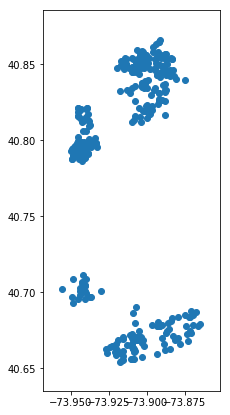

In [169]:
nyc_healthy_grocery_gdf.plot(figsize=(7,7))

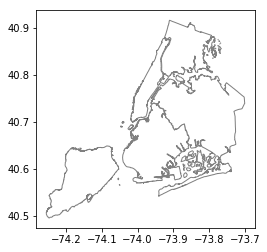

In [171]:
boroughs_url = 'https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson'
boroughs_gdf = gpd.read_file(boroughs_url)

boroughs_gdf.plot(color='white', edgecolor='gray')

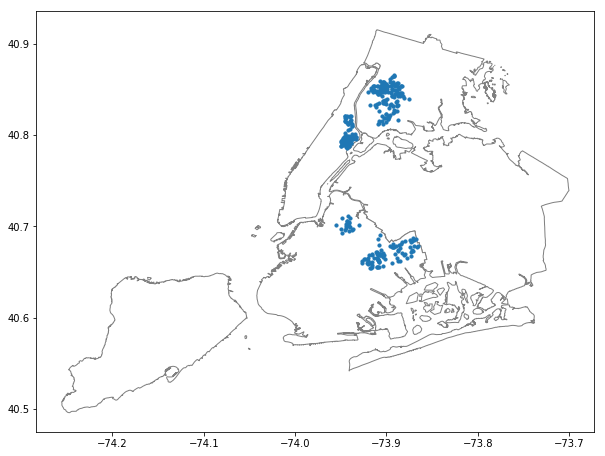

In [172]:
base=boroughs_gdf.plot(color='white', edgecolor='gray', figsize=(10,10))
nyc_healthy_grocery_gdf.plot(ax=base, markersize=10)

In [174]:
nyc_grocery_zip_dist = nyc_grocery['Zip Code'].value_counts()
nyc_grocery_zip_dist

11220    227
11226    225
11385    204
11212    197
11207    195
        ... 
11697      1
11001      1
10278      1
10174      1
10285      1
Name: Zip Code, Length: 190, dtype: int64

In [176]:
nyc_healthy_grocery_zip_dist = nyc_healthy_grocery['Zip \nCode'].value_counts()
nyc_healthy_grocery_zip_dist

10029    56
10457    52
11212    50
10453    30
10458    23
11206    22
10459    22
11208    21
11207    19
10460    18
10456    13
10035    12
10030    12
10037    10
10455     7
10474     1
Name: Zip \nCode, dtype: int64

There are much less zip codes for the healthy NYC dataset. As we saw from the map, these healthy grocery stores are concentrated in certain areas.


I am going to do the same looking where I find the income by zip code in NYC and see if there are any associations between the areas with the most grocery stores and also the areas with the most "healthy" grocery stores

The dataset that I have only includes Manhattan

In [177]:
nyc_income = pd.read_excel('../data/nycincome.xlsx')
nyc_income.head()

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
0,1,10007,"40.713973, -74.008336","New York, New York",3522,112947,#132
1,2,10280,"40.708501, -74.016828","New York, New York",6614,108536,#157
2,3,10162,"40.769298, -73.949942","New York, New York",1726,108416,#158
3,4,10004,"40.691870, -74.014109","New York, New York",1225,101868,#238
4,5,10069,"40.775551, -73.989689","New York, New York",1403,88091,#507


In [182]:
nyc_healthy_grocery['Borough'].value_counts()

Bronx       166
Brooklyn    112
New York     90
Name: Borough, dtype: int64

# FB

* Good start and great that you are bringing together multiple data sources.

* Don't forget to do the explore, tidy, clean and save steps so you have more usable column names, e.g. not:
  ```
   nyc_healthy_grocery['Zip \nCode']
   ```
   
   
* And also practice merging data frames when you have common column(s) like zipcode.

